# PySpark MLlib Live Assignment

- The following assignment is based on [Machine Learning with PySpark and MLlib](https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa)

## Data Loader

In [0]:
%sh wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2021-01-27 20:14:16-- https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

 0K .......... .......... .......... .......... .......... 8% 653K 1s
 50K .......... .......... .......... .......... .......... 17% 1.26M 1s
 100K .......... .......... .......... .......... .......... 26% 1.33M 0s
 150K .......... .......... .......... .......... .......... 35% 1.38M 0s
 200K .......... .......... .......... .......... .......... 44% 1.35M 0s
 250K .......... .......... .......... .......... .......... 53% 20.1M 0s
 300K .......... .......... .......... .......... .......... 61% 16.7M 0s
 350K .......... .......... .......... .......... .......... 70% 1.55M 0s
 400K .......... .......... .......... .......... .......... 79% 30.7M 0s
 450K .......... .......... .......... .......... .......... 88% 1.41M 0s
 500K .......... .......... .......... .......... .......... 97% 35.5M 0s
 550K .......... ..... 100% 102M=0.3s

2021-01-27 20:14:16 (1.85 MB/s) - ‘bank.zip’ saved [579043/579043]

In [0]:
# Unzipping the bank.csv
%sh unzip "bank.zip"

bank.zip conf	derby.log eventlogs logs

## Exploring The Data

- We will use the direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (Yes/No) to a term deposit. The dataset can be downloaded from [Kaggle](https://www.kaggle.com/rouseguy/bankbalanced/data).

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('file:/databricks/driver/bank.csv', header = True, inferSchema = True, sep=';')
df.printSchema()

root
-- age: integer (nullable = true)
-- job: string (nullable = true)
-- marital: string (nullable = true)
-- education: string (nullable = true)
-- default: string (nullable = true)
-- balance: integer (nullable = true)
-- housing: string (nullable = true)
-- loan: string (nullable = true)
-- contact: string (nullable = true)
-- day: integer (nullable = true)
-- month: string (nullable = true)
-- duration: integer (nullable = true)
-- campaign: integer (nullable = true)
-- pdays: integer (nullable = true)
-- previous: integer (nullable = true)
-- poutcome: string (nullable = true)
-- y: string (nullable = true)

Input variables: age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome.
Output variable: deposit
Have a peek of the first five observations. Pandas data frame is prettier than Spark DataFrame.show().

In [0]:
import pandas as pd

pd.DataFrame(df.take(5), columns=df.columns).transpose()

Out[10]:

,0,1,2,3,4
age,30,33,35,30,59
job,unemployed,services,management,management,blue-collar
marital,married,married,single,married,married
education,primary,secondary,tertiary,tertiary,secondary
default,no,no,no,no,no
balance,1787,4789,1350,1476,0
housing,no,yes,yes,yes,yes
loan,no,yes,no,yes,no
contact,cellular,cellular,cellular,unknown,unknown
day,19,11,16,3,5


### Summary statistics for numeric variables

In [0]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

Out[11]:

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,4521,41.17009511170095,10.576210958711263,19,87
balance,4521,1422.6578190665782,3009.6381424673395,-3313,71188
day,4521,15.915284229152842,8.247667327229934,1,31
duration,4521,263.96129174961294,259.85663262468216,4,3025
campaign,4521,2.793629727936297,3.1098066601885823,1,50
pdays,4521,39.766644547666445,100.12112444301656,-1,871
previous,4521,0.5425790754257908,1.6935623506071211,0,25


### Correlations between independent variables.

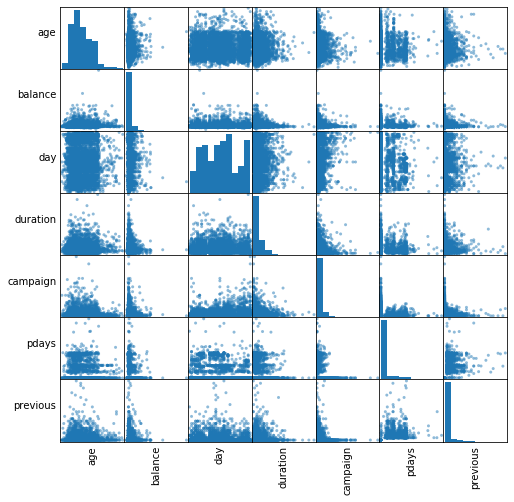

In [0]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

It’s obvious that there aren’t highly correlated numeric variables. Therefore, we will keep all of them for the model. However, day and month columns are not really useful, we will remove these two columns.

In [0]:
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y')
cols = df.columns
df.printSchema()

root
-- age: integer (nullable = true)
-- job: string (nullable = true)
-- marital: string (nullable = true)
-- education: string (nullable = true)
-- default: string (nullable = true)
-- balance: integer (nullable = true)
-- housing: string (nullable = true)
-- loan: string (nullable = true)
-- contact: string (nullable = true)
-- duration: integer (nullable = true)
-- campaign: integer (nullable = true)
-- pdays: integer (nullable = true)
-- previous: integer (nullable = true)
-- poutcome: string (nullable = true)
-- y: string (nullable = true)

## Preparing Data for Machine Learning

The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

In [0]:
from pyspark.ml.feature import OneHotEncoder , StringIndexer, VectorAssembler

categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'y', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
### START CODE ###
# Use VectorAssembler and pass in assemblerInputs as inputCols and name the outputCol "features"
assembler = 
### END CODE ###
stages += [assembler]

The above code is taken from [databricks’ official site](https://docs.databricks.com/applications/machine-learning/train-model/mllib/index.html#binary-classification-example) and it indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row. We use the StringIndexer again to encode our labels to label indices. Next, we use the VectorAssembler to combine all the feature columns into a single vector column.

## Pipeline

We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
### START CODE ###
# Fit the pipeline on df
pipelineModel = 
# Transform pipelineModel on df
df = 
### END CODE ###
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
-- label: double (nullable = false)
-- features: vector (nullable = true)
-- age: integer (nullable = true)
-- job: string (nullable = true)
-- marital: string (nullable = true)
-- education: string (nullable = true)
-- default: string (nullable = true)
-- balance: integer (nullable = true)
-- housing: string (nullable = true)
-- loan: string (nullable = true)
-- contact: string (nullable = true)
-- duration: integer (nullable = true)
-- campaign: integer (nullable = true)
-- pdays: integer (nullable = true)
-- previous: integer (nullable = true)
-- poutcome: string (nullable = true)
-- y: string (nullable = true)

In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

Out[25]:

,0,1,2,3,4
label,0,0,0,0,0
features,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,30,33,35,30,59
job,unemployed,services,management,management,blue-collar
marital,married,married,single,married,married
education,primary,secondary,tertiary,tertiary,secondary
default,no,no,no,no,no
balance,1787,4789,1350,1476,0
housing,no,yes,yes,yes,yes
loan,no,yes,no,yes,no


In [0]:
### START CODE ###
# Do a randomSplit with 0.7 and 0.3 with a seed 42
train, test = 
### END CODE ###
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 3204
Test Dataset Count: 1317

## Logistic Regression Model

- You can build a RandomForestClassifier with : from pyspark.ml.classification import RandomForestClassifier
- You can build a Gradient-Boosted Tree Classifier with : from pyspark.ml.classification import GBTClassifier

In [0]:
from pyspark.ml.classification import LogisticRegression

### START CODE ###
# Fit a LogisticRegression with featuresCol as 'features', labelCol as 'label' and a maxIter of 10
lr = 
### END CODE ###
lrModel = lr.fit(train)

We can obtain the coefficients by using LogisticRegressionModel’s attributes.

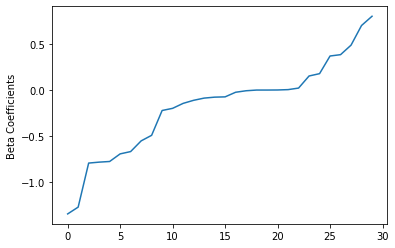

In [0]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

### Evaluate our Logistic Regression model.

In [0]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
age| job|label| rawPrediction|prediction| probability|
+---+----------+-----+--------------------+----------+--------------------+
 31|management| 0.0|[3.23326613278788...| 0.0|[0.96206712713122...|
 44|management| 0.0|[4.19290842486324...| 0.0|[0.98512238905947...|
 52|management| 0.0|[3.85751656750926...| 0.0|[0.97931645886313...|
 56|management| 0.0|[0.18182496584194...| 0.0|[0.54533142095423...|
 39|management| 0.0|[3.86576324781723...| 0.0|[0.97948284279122...|
 40|management| 0.0|[3.56579525339781...| 0.0|[0.97250297328286...|
 34|management| 0.0|[2.71481964959365...| 0.0|[0.93789547461137...|
 42|management| 0.0|[4.72668431180685...| 0.0|[0.99122195108040...|
 44|management| 0.0|[4.12686043725349...| 0.0|[0.98412270420360...|
 44|management| 0.0|[4.70130945699949...| 0.0|[0.99099838997786...|
+---+----------+-----+--------------------+----------+--------------------+
only showing top 10 rows

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8645837909070939

## OPTIONAL: HyperParameter Tuning a Gradient-Boosted Tree Classifier

In [0]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
age| job|label| rawPrediction|prediction| probability|
+---+----------+-----+--------------------+----------+--------------------+
 31|management| 0.0|[1.23133755099197...| 0.0|[0.92148342941421...|
 44|management| 0.0|[1.24813307233727...| 0.0|[0.92387964795029...|
 52|management| 0.0|[1.24944306491954...| 0.0|[0.92406369664030...|
 56|management| 0.0|[0.08766133054069...| 0.0|[0.54371873692479...|
 39|management| 0.0|[1.28717734699096...| 0.0|[0.92919274290177...|
 40|management| 0.0|[1.28717734699096...| 0.0|[0.92919274290177...|
 34|management| 0.0|[1.18910613832260...| 0.0|[0.91515072075357...|
 42|management| 0.0|[1.28667149270096...| 0.0|[0.92912615005269...|
 44|management| 0.0|[1.28079740810612...| 0.0|[0.92834861336488...|
 44|management| 0.0|[1.30995409605687...| 0.0|[0.93213189870088...|
+---+----------+-----+--------------------+----------+--------------------+
only showing top 10 rows

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)